# 0.0 IMPORTS



In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
import datetime

## 0.1 HELPER FUNCTIONS

## 0.2 LOADING DATA

In [2]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory=False)
df_store_raw = pd.read_csv( 'data/store.csv', low_memory=False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')


In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
47414,585,5,2015-06-19,5327,796,1,1,0,0,d,c,440.0,4.0,2014.0,0,NaN,NaN,NaN


# 1.0 DESCRICAO DOS DADOS



In [4]:
df1 = df_raw.copy()

In [5]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 RENAME COLUMNS

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 DATA DIMENSIONS

In [8]:
print( 'Numer of Rows: {}'.format (df1.shape[0]))
print( 'Numer of Cols: {}'.format (df1.shape[1]))

Numer of Rows: 1017209
Numer of Cols: 18


## 1.3 DATA TYPES


In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 CHECK NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FILLOUT NA


In [11]:
df1['competition_distance'].max()

75860.0

In [12]:
#competition_distance   
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year  
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

#promo2_since_week    
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

#promo_interval 
month_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [13]:
df1.sample(5).T

,50167,328656,212856,412101,543138
store,1108,779,1007,337,919
day_of_week,3,3,4,5,7
date,2015-06-17 00:00:00,2014-09-24 00:00:00,2015-01-22 00:00:00,2014-06-27 00:00:00,2014-03-02 00:00:00
sales,7018,5663,5119,4476,0
customers,637,619,703,364,0
open,1,1,1,1,0
promo,1,0,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,c,d,a


In [14]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.6 CHANGE TYPES

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 DESCRIPTIVE STATISTICAL

In [16]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## 1.7.1 NUMERICAL ATTRIBRUTES

In [17]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


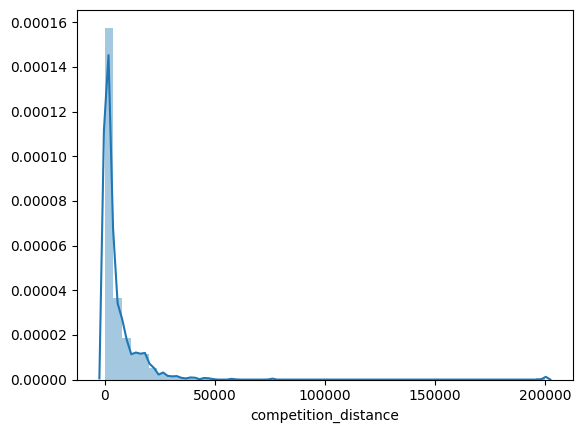

In [18]:
sns.distplot(df1['competition_distance'])

## 1.7.2 CATEGORICAL ATTRIBUTES

In [19]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

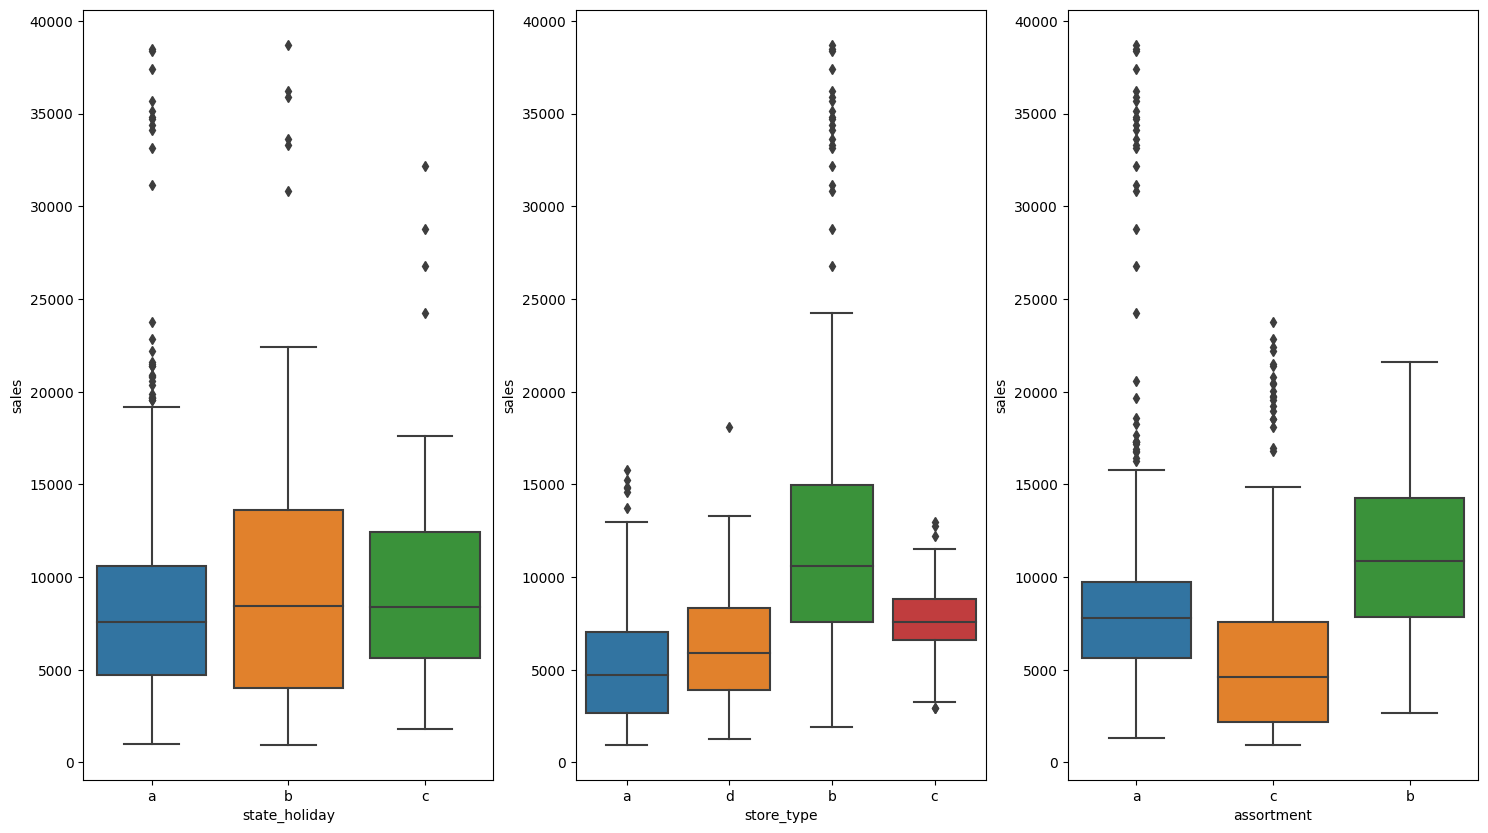

In [20]:
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0)]

plt.figure(figsize=(18, 10))
plt.subplot( 1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot( 1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot( 1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)



# 2.0 FEATURE ENGINEERING

In [21]:
df2 = df1.copy()

## 2.1 MAPA MENTAL DE HIPOTESES

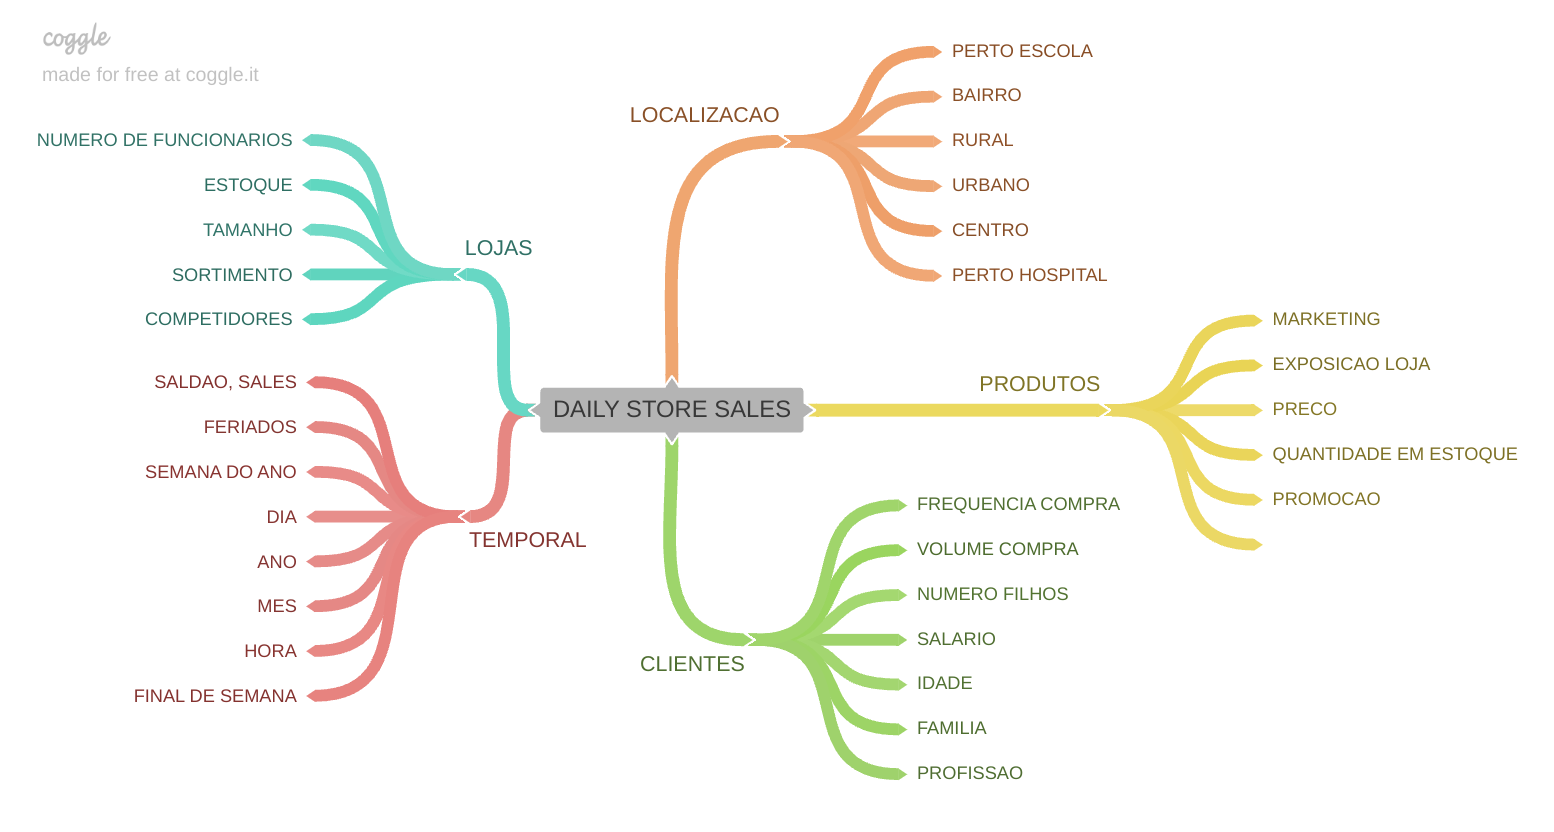

In [22]:
Image('img/DAILY_STORE_SALES.png')

## 2.1 CRIACAO DAS HIPOTESES

### 2.1.1 HIPOTESES DA LOJA

**1.** LOJAS COM MAIOR QUADRO DE FUNCIONARIOS DEVERIAM VENDER MAIS.

**2.** LOJAS COM MAIOR ESTOQUE DEVERIAM VENDER MAIS.

**3.** LOJAS COM MAIOR PORTE DEVERIAM VENDER MAIS.

**4.** LOJAS COM MENOR PORTE DEVERIAM VENDER MENOS.

**5.** LOJAS COM MAIOR SORTIMENTO DEVERIAM VENDER MAIS.

**6.** LOJAS COM COMPETIDORES MAIS PROXIMOS DEVERIAM VENDER MENOS.

**7.** LOJAS COM COMPETIDORES A MAIS TEMPO DEVERIAM VENDER MAIS.

### 2.1.2 HIPOTESES DO PRODUTO

**1.** LOJAS QUE INVESTEM MAIS EM MARKETING DEVERIAM VENDER MAIS.

**2.** LOJAS QUE EXPOEM MAIS O PRODUTO NAS VITRINES DEVERIAM VENDER MAIS.

**3.** LOJAS QUE TEM PRECOS MENORES NOS PRODUTOS DEVERIAM VENDER MAIS.

**4.** LOJAS COM PROMOCOES MAIS AGRESSIVAS (DESCONTOS MAIORES), DEVERIAM VENDER MAIS.

**5.** LOJAS COM PROMOCOES ATIVAS POR MAIS TEMPO DEVERIAM VENDER MAIS.

**6.** LOJAS COM MAIS DIAS DE PROMOCAO DEVERIAM VENDER MAIS.

**7.** LOJAS COM MAIS PROMOCOES CONSECUTIVAS DEVERIAM VENDER MAIS.


### 2.1.3 HIPOTESES DO TEMPO

**1.** LOJAS ABERTAS DURANTE O FERIADO DE NATAL DEVERIAM VENDER MAIS.

**2.** LOJAS DEVERIAM VENDER MAIS AO LONGO DOS ANOS.

**3.** LOJAS DEVERIAM VENDER MAIS NO SEGUNDO SEMESTRE DO ANO.

**4.** LOJAS DEVERIAM VENDER MAIS DEPOIS DO DIA 10 DE CADA MES.

**5.** LOJAS DEVERIAM VENDER MENOS AOS FINAIS DE SEMANA.

**6.** LOJAS DEVERIAM VENDER MENOS DURANTE OS FERIADOS ESCOLARES.

## 2.2 LISTA FINAL DE HIPOTESES

**1.** LOJAS COM MAIOR SORTIMENTO DEVERIAM VENDER MAIS.

**2.** LOJAS COM COMPETIDORES MAIS PROXIMOS DEVERIAM VENDER MENOS.

**3.** LOJAS COM COMPETIDORES A MAIS TEMPO DEVERIAM VENDER MAIS.

**4.** LOJAS COM PROMOCOES ATIVAS POR MAIS TEMPO DEVERIAM VENDER MAIS.

**5.** LOJAS COM MAIS DIAS DE PROMOCAO DEVERIAM VENDER MAIS.

**6.** LOJAS COM MAIS PROMOCOES CONSECUTIVAS DEVERIAM VENDER MAIS.

**7.** LOJAS ABERTAS DURANTE O FERIADO DE NATAL DEVERIAM VENDER MAIS.

**8.** LOJAS DEVERIAM VENDER MAIS AO LONGO DOS ANOS.

**9.** LOJAS DEVERIAM VENDER MAIS NO SEGUNDO SEMESTRE DO ANO.

**10.** LOJAS DEVERIAM VENDER MAIS DEPOIS DO DIA 10 DE CADA MES.

**11.** LOJAS DEVERIAM VENDER MENOS AOS FINAIS DE SEMANA.

**12.** LOJAS DEVERIAM VENDER MENOS DURANTE OS FERIADOS ESCOLARES.

## 2.3 FEATURE ENGINEERING

In [23]:
df2.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0


In [24]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) /30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply ( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply  (lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply (lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [25]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
